# Edges → Rapid change in image intensity function

Could occur due to :

- Surface color/Appearance discontinuity
- Illumination discontinuity
- Surface normal discontinuity
- Depth discontinuity

![](https://img.techpowerup.org/200924/screenshot-from-2020-09-24-15-20-01.png)

Source : https://onlinecourses.nptel.ac.in/noc20_cs88/

There are many edge detection algorithms such as Canny edge detection, Robert, Prewitt, Sobel etc

Canny and Sobel edge detection algorithms are the notable ones


#Sobel Edge Detection
---

Used for finding gradient magnitude at each point in a gray scale image

Cons:

- Poor localization, which means you will see multiple edges instead of only a single edge curve
- Can miss edges which are neither verticle or horizontal


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
!wget -O image.jpg https://images-na.ssl-images-amazon.com/images/I/51kQM%2BEbZxL._SX425_.jpg #http://thegrimm.net/2017/12/14/tensorflow-image-convolution-edge-detection/plain_cup.png  

--2020-09-24 09:12:31--  https://images-na.ssl-images-amazon.com/images/I/51kQM%2BEbZxL._SX425_.jpg
Resolving images-na.ssl-images-amazon.com (images-na.ssl-images-amazon.com)... 151.101.1.16, 151.101.65.16, 151.101.129.16, ...
Connecting to images-na.ssl-images-amazon.com (images-na.ssl-images-amazon.com)|151.101.1.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14674 (14K) [image/jpeg]
Saving to: ‘image.jpg’

image.jpg           100%[===================>]  14.33K  --.-KB/s    in 0.01s   

2020-09-24 09:12:31 (1.42 MB/s) - ‘image.jpg’ saved [14674/14674]



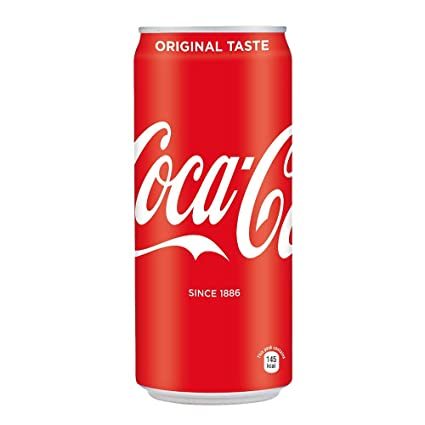

In [ ]:
image = cv2.imread('./image.jpg', 1)
cv2_imshow(image)

In [ ]:
filter_v = tf.constant([
    [-1,  0,  1],
    [-2,  0,  2],
    [-1,  0,  1]
], dtype=tf.float32, name='sobel_vertical')
filter_v = tf.reshape(filter_v, [3, 3, 1, 1]) #[filter_height, filter_width, in_channels, out_channels]


filter_h = tf.constant([
    [-1,  -2,  -1], 
    [ 0,   0,   0], 
    [ 1,   2,   1]
], dtype=tf.float32, name='sobel_horizontal')
filter_h = tf.reshape(filter_h, [3, 3, 1, 1]) #[filter_height, filter_width, in_channels, out_channels]


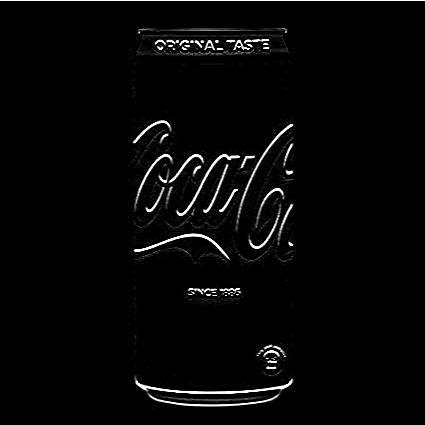

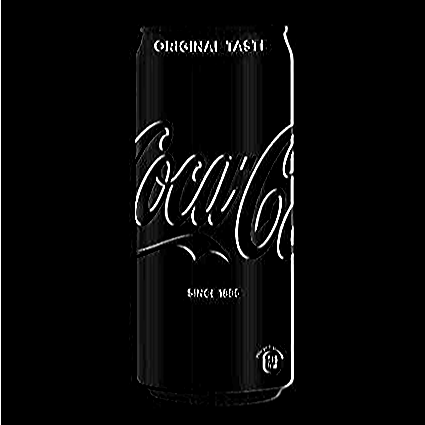

In [ ]:
image = tf.io.read_file('./image.jpg')
image = tf.image.decode_jpeg(image, channels=1)
image = tf.expand_dims(image, 0)
image = tf.cast(image, dtype=tf.float32) #/ 255.

image_x = tf.nn.conv2d(image, filters=filter_h, strides=[1, 1, 1, 1], padding='SAME')
image_y = tf.nn.conv2d(image, filters=filter_v, strides=[1, 1, 1, 1], padding='SAME')
'''strides=[1, 1, 1, 1] -----> 
Move the kernel across num_of_images, height_of_imgs, width_of_images, num_channels in 1x1x1x1 fashion
1x2x2x1 -> skip 2 pixels in w and h -> will result in downsampling '''

image = tf.squeeze(image_x)
cv2_imshow(image.numpy()) 
image = tf.squeeze(image_y)
cv2_imshow(image.numpy()) 

Combine the horizontal and vertical edges

In [ ]:
image_x = image_x.numpy()
image_y = image_y.numpy()

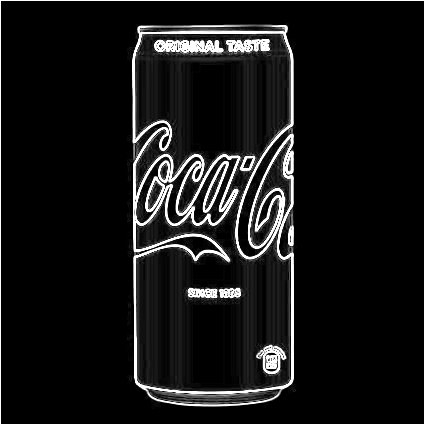

In [ ]:
import math
image_sobel = np.sqrt(np.square(image_x) + np.square(image_y))
image_sobel = tf.squeeze(image_sobel)
cv2_imshow(image_sobel.numpy()) 

#References 🔖

[https://www.researchgate.net/publication/297736749_Comparison_of_Edge_Detection_Techniques](https://www.researchgate.net/publication/297736749_Comparison_of_Edge_Detection_Techniques)

https://onlinecourses.nptel.ac.in/noc20_cs88/c